In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns; 
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [9]:
df = pd.read_csv('cleaned_data_SC.csv', encoding='unicode_escape')
df.head()
df.columns

Index(['Unnamed: 0', 'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Name', 'Customer City', 'Customer Country', 'Customer Id',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [60]:
df[['Order Item Product Price']]

Order Item Product Price
0                     327.750000
1                     327.750000
2                     327.750000
3                     327.750000
4                     327.750000
...                          ...
180514                399.980011
180515                399.980011
180516                399.980011
180517                399.980011
180518                399.980011

[180519 rows x 1 columns]

In [74]:
data_sales=df[[  'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', #'Late_delivery_risk',
       'Category Name', 'Customer City', 'Customer Country', #'Customer Id',
       'Customer Segment', 'Customer State', #'Customer Zipcode',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', #'Order Id', 
       'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 
       'Sales',
       #'Order Item Total', 'Order Profit Per Order', 
       # 'Order Region','Order State', 'Order Status', 
       'Product Name', 'Product Price',
       'shipping date (DateOrders)', 
       'Shipping Mode']]

In [75]:
features=data_sales.drop(columns=['Sales', 'Days for shipping (real)','Days for shipment (scheduled)','Sales per customer' ])
target=data_sales['Sales']

In [103]:
features

Type  Benefit per order  Delivery Status  Category Name  \
0          1              18934                0             40   
1          3               2272                1             40   
2          0               2293                3             40   
3          1              13638                0             40   
4          2              20599                0             40   
...      ...                ...              ...            ...   
180514     0              15208                3             18   
180515     1                422                1             18   
180516     3              20768                1             18   
180517     2              21463                0             18   
180518     2              21263                3             18   

        Customer City  Customer Country  Customer Segment  Customer State  \
0                  66                 1                 0              36   
1                  66                 1                 0              36   
2                 452                 0                 0               5   
3                 285                 0                 2               5   
4                  66                 1                 1              36   
...               ...               ...               ...             ...   
180514             59                 0                 2              31   
180515             26                 0                 1               5   
180516             55                 0                 1               7   
180517             66                 1                 0              36   
180518             66                 1                 0              36   

        Department Name  Market  Order City  Order Country  \
0                     4       3         331             70   
1                     4       3         391             69   
2                     4       3         391             69   
3                     4       3        3226              8   
4                     4       3        3226              8   
...                 ...     ...         ...            ...   
180514                3       3        2922             31   
180515                3       3        1362             77   
180516                3       3          25              8   
180517                3       3          25              8   
180518                3       3        2203             69   

        order date (DateOrders)  Order Item Product Price  \
0                          5961                        62   
1                          1147                        62   
2                          1146                        62   
3                          1145                        62   
4                          1144                        62   
...                         ...                       ...   
180514                     1774                        66   
180515                     1758                        66   
180516                     1526                        66   
180517                     1524                        66   
180518                     1517                        66   

        Order Item Profit Ratio  Order Item Quantity  Product Name  \
0                           140                    0            78   
1                            44                    0            78   
2                            44                    0            78   
3                           119                    0            78   
4                           156                    0            78   
...                         ...                  ...           ...   
180514                      121                    0            24   
180515                       21                    0            24   
180516                      147                    0            24   
180517                      159                    0            24   
180518                      15

In [77]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [78]:
features=features.apply(Labelencoder_feature)
features.head()

Type  Benefit per order  Delivery Status  Category Name  Customer City  \
0     1              18934                0             40             66   
1     3               2272                1             40             66   
2     0               2293                3             40            452   
3     1              13638                0             40            285   
4     2              20599                0             40             66   

   Customer Country  Customer Segment  Customer State  Department Name  \
0                 1                 0              36                4   
1                 1                 0              36                4   
2                 0                 0               5                4   
3                 0                 2               5                4   
4                 1                 1              36                4   

   Market  Order City  Order Country  order date (DateOrders)  \
0       3         331             70                     5961   
1       3         391             69                     1147   
2       3         391             69                     1146   
3       3        3226              8                     1145   
4       3        3226              8                     1144   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                        62                      140                    0   
1                        62                       44                    0   
2                        62                       44                    0   
3                        62                      119                    0   
4                        62                      156                    0   

   Product Name  Product Price  shipping date (DateOrders)  Shipping Mode  
0            78             62                       27149              3  
1            78             62                        2209              3  
2            78             62                        1980              3  
3            78             62                        1752              3  
4            78             62                        1528              3

In [79]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [80]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [81]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

Variable        F_Value  P_Value
9                       Market     240.910781    0.000
1            Benefit per order   13782.670150    0.000
17               Product Price  116680.120560    0.000
3                Category Name   26066.331991    0.000
16                Product Name   37751.723070    0.000
15         Order Item Quantity    2068.678936    0.000
13    Order Item Product Price  116680.120560    0.000
8              Department Name     524.094617    0.000
18  shipping date (DateOrders)     142.652140    0.000
12     order date (DateOrders)     128.461963    0.000
10                  Order City       8.763986    0.003
6             Customer Segment       4.266892    0.039

In [82]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Market', 'Benefit per order', 'Product Price', 'Category Name',
       'Product Name', 'Order Item Quantity', 'Order Item Product Price',
       'Department Name', 'shipping date (DateOrders)',
       'order date (DateOrders)', 'Order City', 'Customer Segment'],
      dtype=object)

In [83]:
final_features=features[['Market', 'Benefit per order', 'Product Price', 'Category Name',
       'Product Name', 'Order Item Quantity', 'Order Item Product Price',
       'Department Name', 'shipping date (DateOrders)',
       'order date (DateOrders)', 'Order City', 'Customer Segment']]

In [84]:
final_data=pd.concat([final_features, target], axis=1)

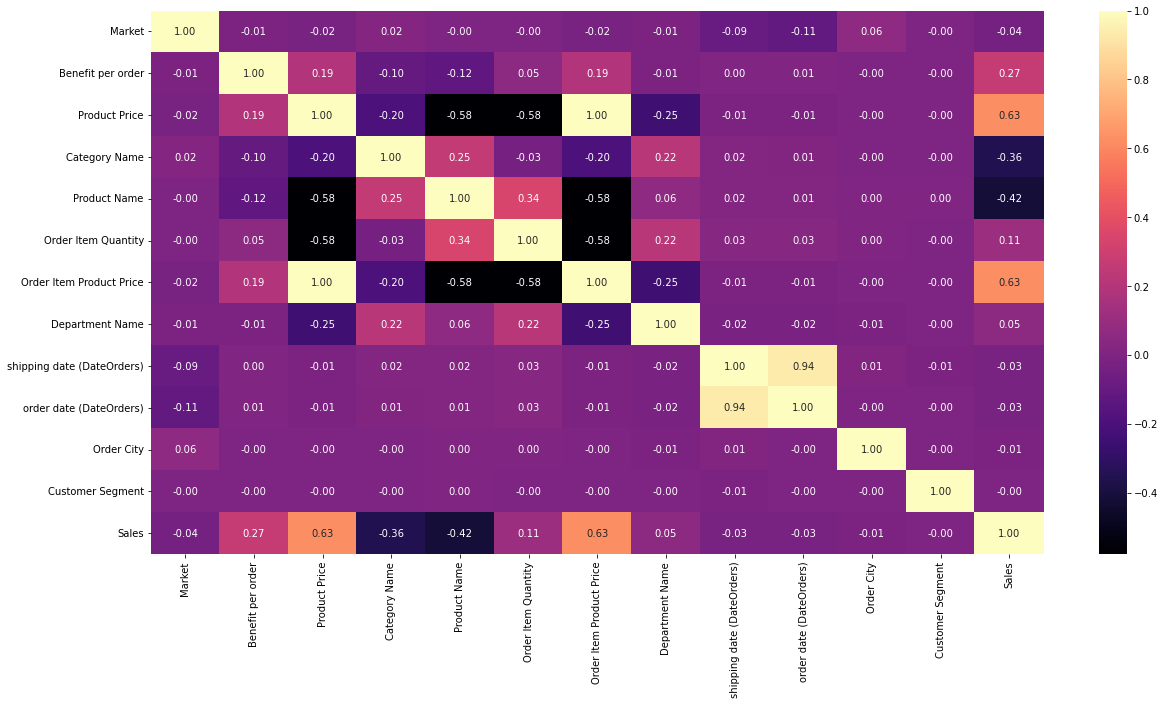

In [85]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [86]:
%pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bridm\anaconda3\python.exe -m pip install --upgrade pip' command.


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [88]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [89]:
pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline, knn_pipeline]

pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost",
            5: "Decision Tree", 6: "KNN"}

In [90]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.769707120775981
Ridge :  0.7697085652060454
Lasso :  0.769124222557983
RandomForest :  0.9998977301537112
XGBoost :  0.9998054256857557
Decision Tree :  0.9578604833513641


In [91]:
grid_params = [   
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],     
}
]

In [92]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [93]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [94]:
best_model = random_search.fit(X_train, y_train)

c:\Users\bridm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:  6.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  9.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.4min finished


In [95]:
best_model.best_params_

{'classifier__n_estimators': 300,
 'classifier': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)}

In [96]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [97]:
model = pipeline_XGBRegressor.fit(X_train, y_train)

In [98]:
XGB_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
XGB_train_predict.head()

actual   predicted
99963  149.940002  149.942001
63538  210.850006  210.851120
6661   179.970001  179.966324
93913  129.990005  129.990143
90626  129.990005  129.989380

In [99]:
XGB_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
XGB_test_predict.head()

actual   predicted
80120   199.990005  199.990448
19670   250.000000  249.999832
114887  249.899994  249.900070
120110  299.980011  299.980133
56658   119.970001  119.971344

In [100]:
predict = model.predict(X_test)

In [101]:
r2_score(y_test, predict, multioutput='uniform_average')

0.9999997106108577

In [102]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predict, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')